# Projekt dotyczący równań różcznikowych w technice

Krzysztof Jankowski, Damian Szuster

# Część I: Wprowadzenie

# Część II: Model

Rozpatrujemy model logistyczny z pojemnością środowiska zmienną w czasie $$\frac{dy}{dt}=ry(1-\frac{y}{K(t)}),$$ gdzie: 

$y(t)$ - liczebność populacji w czasie $t$,

$r$ - współczynnik tempa wzrostu populacji, 

$K(t)$ - pojemność środowiska w czasie $t$.

Rozwiązujemy równanie logistyczne z danym warunkiem początkowym $y(0)=y_{0}$.
$$\frac{dy}{dt}=ry-\frac{ry^{2}}{K(t)}$$
$$\frac{dy}{dt}-ry=-\frac{ry^{2}}{K(t)}$$

Mnożymy obie strony równania przez $\frac{-1}{y^{2}}$.

$$\frac{-1}{y^{2}}\frac{dy}{dt}+\frac{r}{y}=\frac{r}{K(t)}$$

Zastosujemy teraz podstawienie $u=y^{-1}$. Stąd $u'=\frac{y'}{y^{2}}$, a zatem

$$u'+ru=\frac{r}{K(t)}.$$

Mnożymy obie strony równania przez czynnik całkujący: $e^{\int p(t) \operatorname{dt}}$, gdzie $p(t)=r$.

$$e^{rt}u'+e^{rt}ru=\frac{re^{rt}}{K(t)}$$
$$(ue^{rt})'=\frac{re^{rt}}{K(t)}$$
$$ue^{rt}=\int \frac{re^{rt}}{K(t)} \operatorname{dt}$$
$$u=\frac{r}{e^{rt}}\int \frac{re^{rt}}{K(t)} \operatorname{dt}$$

Teraz wyznaczymy funkcję $K(t)$. W tym celu zakładamy, że pojemność środowiska rośnie zgodnie z modelem Malthusa.
$$\frac{dK}{dt}=(b-d)K,$$
gdzie $b$ jest współczynnikiem rozrostu pojemności środowiska, a $d$ jest współczynnikiem jej zmniejszania.

Rozwiązujemy to równanie z danym warunkiem początkowym $K(0)=K_{0}$, stosując metodę rozdzielania zmiennych.
$$\frac{1}{K} \frac{dK}{dt}=b-d$$
$$\int \frac{dK}{K}=\int b-d \operatorname{dt}$$
$$ln K=(b-d)t+C$$
$$K=e^{(b-d)t+C}=De^{(b-d)t}$$

Uwzględniając warunek początkowy otrzymujemy naszą szukaną funkcję $K$.
$$K_{0}=De^{0}=D$$
$$K(t)=K_{0}e^{(b-d)t}$$

Wracając do równania z funkcją $u$, podstawiamy wyliczoną funkcję $K(t)$.
$$u=\frac{r}{e^{rt}}\int \frac{re^{rt}}{K_{0}e^{(b-d)t}} \operatorname{dt}$$
$$u=\frac{r}{K_{0}e^{rt}}\int e^{t(r-b+d)} \operatorname{dt}$$
$$u=\frac{r}{K_{0}e^{rt}}(\frac{e^{(r-b+d)t}}{r-b+d}+C_{1})$$

Stąd $$y(t)=\frac{K_{0}e^{rt}}{r(\frac{e^{(r-b+d)t}}{r-b+d}+C_{1})}$$

Ostatni krok to wyznaczenie stałej $C_{1}$. Wobec tego skorzystamy z warunku początkowego $y(0)=y_{0}.$
$$y_{0}=\frac{K_{0}}{r(\frac{1}{r-b+d}+C_{1})}$$
$$y_{0}r(\frac{1}{r-b+d}+C_{1})=K_{0}$$
$$\frac{1}{r-b+d}+C_{1}=\frac{K_{0}}{y_{0}r}$$
$$C_{1}=\frac{K_{0}}{y_{0}r}-\frac{1}{r-b+d}$$

Zatem $$y(t)=\frac{K_{0}e^{rt}}{r(\frac{e^{(r-b+d)t}}{r-b+d}+\frac{K_{0}}{y_{0}r}-\frac{1}{r-b+d})}=\frac{K_{0}e^{rt}}{r(\frac{e^{(r-b+d)t}-1}{r-b+d}+\frac{K_{0}}{y_{0}r})}.$$

# Część III : Metody numeryczne

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###STRUKTURA DANYCH###
class Queue():
    def __init__(self):
        self.l = []
    
    def enqueue(self, item):
        self.l.append(item)
    
    def  dequeue(self):
        return self.l.pop(0)
    
    def is_empty(self):
        return self.l == []
    
    def size(self):
        return len(self.l)
    
    def get_item(self, i):
        if i >= self.size():
            return False
        return self.l[i]

Często w rozwiązywaniu problemów matemeatycznych wzór analityczny szukanego rozwiązania jest niewystarczający. Inżynierowie i naukowcy wielokrotnie potrzebują konkretnej wartości liczbowej do kontynuacji badania danego zagadnienia, czy rozwiązania danego problemu. Z odsieczą przychodzą komputery, które ze swojej definicji specjalizują się w obliczeniach, jednakże jest to obciążone faktem, iż mają one ograniczoną pamięć operacyjną i dla takiego to komputera obce jest pojęcie liczby niewymiernej. Stąd komputery używają różnych aproksymacji i zaokrągleń w dziedzinach matematyki. Mimo to, są bardzo pomocne w szukaniu wartości liczbowych różnych wyrażeń matematycznych, w tym choćby interesujących nas równań różniczkowych. Korzystają one z tak zwanych metod numerycznych, które z różną skutecznością pozwalają przybliżyć szukaną wartość zagadnienia pocztkowego Cauchy'ego. W tej sekcji przyjrzymy się kilku z nim i zaaplikujemy je do naszego modelu. Metody prezentowane są w kolejności odpowiadającej precyzyjności ich aproksymacji od tych z największym błędem do coraz to precyzyjniejszych.

## Metoda Eulera

Weźmy początkowe zagadnienie Cauchy'ego postaci $$\begin{cases}\frac{\text{d}y}{\text{d}t}=f(t,y),\\y(t_0)=y_0.\end{cases} $$
Załóżmy, że funkcje $f$ i $f_y$ są ciągłe na pewnym prostokącie na płaszczyźnie $ty$ zawierającym punkt $(t_0,y_0)$. z twierdzenia ............... wiemy, że istnieje unikatowe rozwiązanie $y = \phi(t)$ dla zadanego problemu w punkcie $t_0$. Przybliżenie rozwiązania otrzymujemy poprzez zastosowanie szeregu Taylora do naszej funkcji.

Przypomnijmy, że szereg Taylora można zapisać w postaci $$ x(t+h) = x(t) + hx'(t) + \frac{1}{2!}h^2x''(t)+ \frac{1}{3!}h^3x'''(t) + \dots  .$$

Metodę Eulera nazywamy metodą rzędu pierwszego, gdyż odrzucamy wszystkie wyrażenia z pochdną rzędu większego niż $1$. Zamiast pewnego $h$ dokonajmy podziału na ciąg odcinków $t_n$. Wtedy możemymy wyprowadzić następujący wzór 
$$\begin{gathered} 
    x(t_{n+1})\approx x(t_n) + (t_{n+1}-t_n)f(t_n,x(t_n)), \\
    \frac{x(t_{n+1}) - x(t_n)}{t_{n+1}-t_n} \approx f(t_n,x(t_n)).
\end{gathered}$$

Jeżeli następnie zamienimy funkcję $x(t)$ w punktach $t_{n+1}$ i $t_n$ przez odpowiadające im wartości $y_{n+1}$ i $y_n$ otrzymamy wzór Eulera $$y_{n+1}=y_n+f(t_n,y_n)(t_{n+1}-t_n), \quad \text{gdzie}\quad n=0,1,2,\dots$$

Dla metod numerycznych bardziej uzasadniony jest zapis pierwszy , gdyż pozwala podać ustalony krok $h$ i w $n$ krokach obliczać $$\begin{gathered}
f_n:=f(t,y),\\
y:=y+h\cdot f_n,\\
t:=t+h.
\end{gathered}
$$

Stąd łatwo zauważyć, że błąd przybliżenia zależny będzie od zadanego rozmiaru kroku $h$, liczby króków $n$, no i przede wszystkim od reszty Lagrange'a czyli $$R_2=\frac{f^{(2)}(c)x^2}{2!},$$ gdzie $c$ leży między $0$ i $x$.

Teraz zaaplikujemy metodę Eulera do naszego problemu, aby znaleźć numerycznie rozwiązanie zagadnienia początkowego.

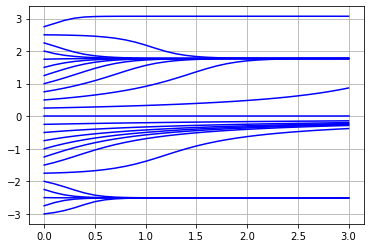

In [ ]:
###DEFINICJA METODY NUMERYCZNEJ###
def euler_method(f, t0, y0, h, n):
    ts = np.ndarray(n + 1, dtype = float)
    ys = np.ndarray(n + 1, dtype = float)
    ts[0] = t0
    ys[0] = y0
    for i in range(n):
        ys[i + 1] = ys[i] + h * f(ts[i], ys[i])
        ts[i + 1] = ts[i] + h
    return ts, ys

###DANE##
t0 = 0
tk = 3
y0 = -1
h = 0.1
n = (tk + h) // h
f = lambda t, y: np.sin(y ** 2)
#f = lambda y,t: np.sin(y**2)
#ts_, ys_ = euler_method(f, t0, y0, h, int(n))

for y0 in np.arange(-3,3,0.25):
    ts_, ys_ = euler_method(f, t0, y0, h, int(n))
    plt.plot(ts_, ys_, 'b-')#numerical

###WYKRES###
#plt.plot(ts_, ys_, 'r.-')#numerical
#plt.plot(ts_, -1 / (ts_ + 1), 'b')
#plt.legend(['Euler', 'anlitycznie'])
plt.grid(1)
#plt.axis([0, tk, 0, ys_[-1] + 1])
plt.show()

## Metoda Heun'a

W niektórych rozważaniach rozważamy tak zwaną metodę Eulera z opóźnionym argumentem. W takiej sytuajci nasza formuła wygląda następująco $$y_{n+1}=y_n+h\cdot f(t_{n+1},y_{n+1})$$

Rozważmy pewne ulepszenia aproksymacji uzyskanej za pomocą metody Eulera. Weźmy jeszcze raz nasze zagadnienie początkowe i zcałkujmy równanie różniczkowe obustronnie. Mamy $$\begin{gathered}
y'=f(t,y(t)),\\
\int_{t_n}^{t_{n+1}}\frac{\text{d}y}{\text{d}t}\text{d}t=y(t_{n+1})-y{t_n}=\int_{t_n}^{t_n+1}f(t,y(t))\text{d}t,\\
y(t_{n+1})=y(t_n)+\int_{t_n}^{t_n+1}f(t,y(t))\text{d}t.
\end{gathered}
$$

Geometrycznie orzymujemy pole pod krzywą. Z definicji całkie Riemanna pamięteamy, że dokonujemy podziału odcinka, na ciąg nieskończenie małych odcinków, które stają się podstawami prostokątów. Następnym krokiem jest Obranie punktów na przedziałach, które posłużą nam do znalezienia wysokości prostokątów, których pola w całce się liczy. Jak pamiętamy, cyfrowo zmuszeni jesteśmy do ręcznego aproksymowania tych wielkości. Przyglądając się raz jeszcze postawionemu algorytmowi można zauważyć, że wskazane przez nas punkty pośrednie na przedziałach leżą na ich lewych krańcach, co jak łatwo zauważyć, może osłabiać precyzję aproksymacji. Lepszą decyzją zdaje się branie punktów na środkach przedziałów naszego podziału. Wtedy wartość obranych przez nas punktów możemy przedstawić w postaci średniej arytmetycznej czyli $\frac{1}{2}(f(t_n,y(t_n))+f(t_{n+1},y(t_{n+1}))$. Wtedy otrzymujemy formułe następującej postaci $$
y_{n+1}=y_n+\frac{h}{2}(f(t_n,y_n)+f(t_{n+1},y_{n+1}).
$$
Na tym etapie problematyczne może okazać się rozwiązanie tego zagadnienia przez pojawienie się $f$ zależnych od wartości zmiennej niezależnej na obu końcach przedziału. Mimo to, łatwo radzimy sobie z tym zagadnieniem poporzez podstawienie $$f(t_{n+1},y_{n+1})=f(t_n+h,y_n+h\cdot f(t_n,y_n)),$$
co prowadzi nas do $$y_{n+1}=y_n+\frac{h}{2}(f_n+f(t_n+h,y_n+h\cdot f_n))$$ znanej także jako wzór Heun'a. Przeanalizujmy jak zmieni się nasz wynik po zaaplikowaniu tego rozszerzenia wzoru Eulera.

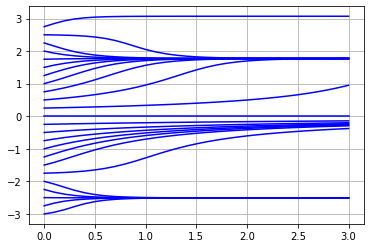

'\n###DANE##\nt0 = 0\ny0 = 1\nh = 2\nf = lambda y, t:y\nts_, ys_ = heun_method(f, t0, y0, h, 100)\n'

In [ ]:
###DEFINICJA METODY NUMERYCZNEJ###
def heun_method(f, t0, y0, h, n):
    ts = np.ndarray(n + 1, dtype = float)
    ys = np.ndarray(n + 1, dtype = float)
    ts[0] = t0
    ys[0] = y0
    for i in range(n):
        fn = f(ts[i], ys[i])
        ys[i + 1] = ys[i] + h * 0.5 * (fn + f(ts[i] + h, ys[i] + h * fn))
        ts[i + 1] = ts[i] + h
    return ts, ys


###DANE##
t0 = 0
tk = 3
y0 = -1
h = 0.1
n = (tk + h) // h
f = lambda t, y: np.sin(y ** 2)
#f = lambda y,t: np.sin(y**2)
#ts_, ys_ = euler_method(f, t0, y0, h, int(n))

for y0 in np.arange(-3,3,0.25):
    ts_, ys_ = heun_method(f, t0, y0, h, int(n))
    plt.plot(ts_, ys_, 'b-')#numerical

###WYKRES###
#plt.plot(ts_, ys_, 'r.-')#numerical
#plt.plot(ts_, -1 / (ts_ + 1), 'b')
#plt.legend(['Euler', 'anlitycznie'])
plt.grid(1)
#plt.axis([0, tk, 0, ys_[-1] + 1])
plt.show()

"""
###DANE##
t0 = 0
y0 = 1
h = 2
f = lambda y, t:y
ts_, ys_ = heun_method(f, t0, y0, h, 100)
"""

## Metody Rungego-Kutty

Jak widać metoda Eulera n-tego rzędu - we wcześniejszych przykładach 1-szego rzędu - wymaga obliczania n-tych pochodnych. Ta klasa metod opiera się na obliczaniu pewnych kombinacji wartości $f$. Zróżniczkujmy obustronnie początkowe równanie. Mamy $$
\begin{gathered}
y'(t)=f(t,y(t)),\\
y''(t)=f_t(t,y(t))+f_y(t,y(t))y'(t)=f_t+ff_y,\\
y'''(t)=f_tt(t,y(t))+f_{ty}(t,y(t))f(t,y(t))+(f_t(t,y(t))+f(t,y(t))f_y(t,y(t)))f_y(t,y(t))+f(t,y(t))(f_{yt}(t,y(t)+f(t,y(t))f+{yy}(t,y(t))),
\end{gathered}$$
itd. Wykorzystując wzór Taylora dla funkcji wielu zmiennych otrzymujemy $$y(t+h)=y+fh+\frac{1}{2}h^2(f_t+ff_y)+O(h^3)=y+\frac{1}{2}hf+\frac{1}{2}hf(t+h,y+hf)+O(h^3),$$ gdzie $O(h^3)$ jest resztą Lagrange'a wynikającą z obcięcia pochodnych stopnia wyższego niż 2. Zauważmy, że otrzymany przez nas rezultat to metoda Heuna, którą przed chwilą rozważaliśmy. Zauważmy, że ogólnie metoda Rungego-Knutty rzędu 2 może być przedstawiona w postaci $$
y(t+h)=y+w_1hf+w_2hf(t+\alpha h,y+\beta hf)+ O(h^3),\quad\text{gdzie}\quad w_1+w_2=1,\quad w_1\alpha =0.5 = w_2\beta).
$$

Rozpatrzmy metodę Rungego-Kutty rzędu 4. Jej konstrukcja jest analogiczna do konstrukcji 2 rzędu, jednak przez ilość wykluwających się pochodnych w kolejnych krokach różniczkowania, bywa to dość czasochłonne. Finalny wzór ma postać $$
y(t+h)\approx y+\frac{1}{6}(F_1+2F_2+2F_3+F_4),
$$ 
gdzie 
$$\begin{gathered}
F_1:=hf(t,y),\\
F_2:=hf(t+\frac{1}{2}h,y+\frac{1}{2}F_1),\\
F_3:=hf(t+\frac{1}{2}h,y+\frac{1}{2}F_2),\\
F_4:=hf(t+h,y+F_3).
\end{gathered}
$$
Zaaplikujemy tę metodę do naszego modelu.

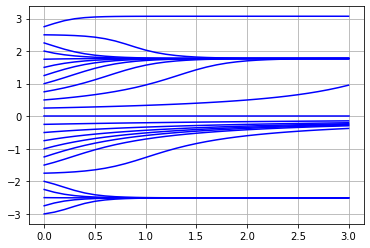

In [ ]:
###DEFINICJA METODY NUMERYCZNEJ###
def rungeKutta_method(f, t0, y0, h, n):
    
    ys = np.ndarray(n + 1, dtype = float)
    ts = np.ndarray(n + 1, dtype = float)
    
    ys[0] = y0
    ts[0] = t0
    for i in range(n):
        f1 = f(ts[i], ys[i])
        f2 = f(ts[i] + h * 0.5, ys[i] + h * 0.5 * f1)
        f3 = f(ts[i] + h * 0.5, ys[i] + h * 0.5 * f2)
        f4 = f(ts[i] + h, ys[i] + h * f3)

        ys[i + 1] = ys[i] + (h / 6.0) * (f1 + 2 * f2 + 2 * f3 + f4)
        ts[i + 1] = ts[i] + h
    return ts, ys



###DANE##
t0 = 0
tk = 3
y0 = -1
h = 0.1
n = (tk + h) // h
f = lambda t, y: np.sin(y ** 2)
#f = lambda y,t: np.sin(y**2)
#ts_, ys_ = euler_method(f, t0, y0, h, int(n))

for y0 in np.arange(-3,3,0.25):
    ts_, ys_ = rungeKutta_method(f, t0, y0, h, int(n))
    plt.plot(ts_, ys_, 'b-')#numerical

###WYKRES###
#plt.plot(ts_, ys_, 'r.-')#numerical
#plt.plot(ts_, -1 / (ts_ + 1), 'b')
#plt.legend(['Euler', 'anlitycznie'])
plt.grid(1)
#plt.axis([0, tk, 0, ys_[-1] + 1])
plt.show()


Jak można zauważyć, metody Rungego-Knutty wymagają w kolejnych krokach algorytmu obliczania pewnej ilości wartości $F_k$ dla odpowiednich k, przez co metody wyższych rzędów stawały się mniej eleganckie w zastosowaniu.  Erwin Fehlberg zaproponował stosowanie metody rzędu 4 wymagającej obliczania 5 wartości oraz 5 rzedu wymagającą obliczaniu 6 wartości, przyczym dokonuje wyboru parametrów (wspomniano oni w wyprowadzeniu wzoru ogólnego dla metody rzędu 2) w taki sposób, by występowały w obu metodach. W ten sposób otrzymujemy przy jednym algorytmie dwa wyniki, jeden dla metody rzędu 4, a drugi dla metody rzędu 5. Metoda ta nosi nazwę metody Rungego-Knutty-Fehlberga.
Oto jej postać
$$
y_1(t+h):=y(t)+\sum^6_{k=1}a_kF_k,\quad y_2(t+h):=y(t)+\sum^6_{k=1}b_kF_k,$$ gdzie $$
F_k:=hf(t + c_kh,y+\sum^{k-1}_{j=1}d_{kj}F_j).
$$

| i | $a_i$ | $b_i$ | $c_i$ | $d_{i1}$ | $d_{i2}$ | $d_{i3}$ |$d_{i4}$ | $d_{i5}$|
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
|1|$\frac{16}{135}$|$0$|-|-|-|-|-|-|
| 2 | $0$ | $0 $|$\frac{1}{4}$|$\frac{1}{4}$| - | - | - | - |
| 3 | $\frac{6656}{12825}$| $-\frac{128}{4275}$ | $\frac{3}{8}$ | $\frac{3}{32}$ | $\frac{9}{32}$ | - | - |
| 4 | $\frac{28561}{56430}$ | $-\frac{2197}{75240}$ | $\frac{12}{13}$ | $\frac{1932}{2197}$ | $-\frac{7200}{2197}$ | $\frac{7296}{2197}$ | - | - |
| 5 | $-\frac{9}{50}$ | $\frac{1}{50}$ | $1$ | $\frac{439}{216}$ | $-8$ | $\frac{3680}{513}$ | $-\frac{845}{4104}$ | - |
| 6 | $\frac{2}{55}$ | $\frac{2}{55}$ | $\frac{1}{2}$ | $-\frac{8}{27}$ | $2$ | $-\frac{3544}{2565}$ | $\frac{1859}{4101}$ | $-\frac{11}{40}$ |



In [ ]:
###DEFINICJA METODY NUMERYCZNEJ###
def rungeKuttaFehlberg_method(f, t0, y0, h, delta, n, tk):
    ys = np.ndarray(n + 1, dtype = float)
    ts = np.ndarray(n + 1, dtype = float)
    
    h = h_max
    ys[0] = y0
    ts[0] = t0
    flag = False
    i = 0
    while i < tk:
        """
        h2 = tk - ts[i]
        if abs(h2) <= h:
            flag = True
            h = h2
        """
        f1 = h * f(ts[i], ys[i])
        f2 = h * f(ts[i] + 0.25 * h, ys[i] + 0.25 * f1)
        f3 = h * f(ts[i] + h * 0.375, ys[i] + 0.09375 * f1 + 0.28125 * f2)
        f4 = h * f(ts[i] + h * 0.92307, ys[i] + 0.8794 * f1 - 3.2772 * f2 + 3.3209 * f3) 
        f5 = h * f(ts[i] + h, ys[i] + 2.0324 * f1 - 8 * f2 + 7.1734 * f3 - 0.2059 * f4) 
        f6 = h * f(ts[i] + h * 0.5, ys[i] - 0.2963 * f1 + 2 * f2 - 1.3817 * f3 + 0.4530 * f4 - 0.275 * f5) 

        y = ys[i] + ( 0.1185 * f1 + 0.5190 * f3 + 0.5061 * f4 - 0.18 * f5 + 0.3636 * f6)
        err = 0.0028 * f1 - 0.030 * f3 - 0.2920 *  f4 + 0.02 * f5 + 0.3636 * f6
        if abs(err) < delta:
            ts[i + 1] = ts[i] + h
            ys[i + 1] = y
        else:
            if abs(err) < top_v / 128.0:
                h = 2 * h
                ys[i + 1] = y
            else:
                ts[i + 1] = ts[i] + h
                i += 1
                if flag:
                    break
    return ts, ys



###DANE##
t0 = 0
tk = 3
y0 = -1
h = 0.1
n = (tk + h) // h
f = lambda t, y: np.sin(y ** 2)
#f = lambda y,t: np.sin(y**2)
#ts_, ys_ = euler_method(f, t0, y0, h, int(n))

for y0 in np.arange(-3,3,0.25):
    ts_, ys_ = rungeKuttaFehlberg_method(f, t0, y0, h, h + 1, int(n))
    plt.plot(ts_, ys_, 'b-')#numerical

###WYKRES###
#plt.plot(ts_, ys_, 'r.-')#numerical
#plt.plot(ts_, -1 / (ts_ + 1), 'b')
#plt.legend(['Euler', 'anlitycznie'])
plt.grid(1)
#plt.axis([0, tk, 0, ys_[-1] + 1])
plt.show()


###WYKRES###
plt.plot(ts_, ys_, 'r.-')
plt.grid(1)
plt.show()


## Metody Wielokrokowe

Metody opisane do tej pory noszą nazwę metod jednokrokowych, gdyż wartości w kolejnych krokach zależne są tylko od poprzedniego kroku. Inną klasą rozwiązań są metody wielokrokowe, które swoje skomplikowanie rekompensują większą precyzją, gdyż wartości w kolejnych krokach uzależnione od większej ilości rezultatów poprzednich obliczeń.

Metoda Adamsa-Bashforta

Niech $f_i:=f(t_i,y_i)$, gdzie $y_i$ jest przybliżoną wartością rozwiązania zagadnienia początkowego w punkcie $t_i$ z $$y(t_{n+1})=y(t_n)+\int_{t_n}^{t_n+1}f(t,y(t))\text{d}t$$ oraz przybliżenia
$$
\int_{t_n}^{t_{n+1}}f\text{d}t= C_1f_n+C_2f_{n-1} + C_3f_{n-2} + \dots
$$
mamy
$$
y_{n+1}=y_n + C_1f_n+C_2f_{n-1}+C_3f_{n-2}+\dots .
$$ Analogicznie do poprzednich metod, jeśli weźmiemy wyrazy do $f_{n-4}$ to nazywać to będziemy metodą stopnia 5. Ogólnie widzimy, że metoda Adamsa opierają się na przybliżaniu całki przez wielomianem k-tego stopnia. Do wyznaczenia współczynników wielomianu stopnia $k$ musimy wykorzystać $k+1$ punktów wcześniej wyznaczonych. Ponownie można zauważyć, że metoda ta stopnia 1 da wzór Eulera. Niech nasz wielomian to $P_4(t)=C_1t^4+c_2t^3+C_3t^2+C_4t+C_5$. Wtedy otrzymujemy następujący układ równań 
$$\begin{cases}
C_1t_n^4+c_2t_n^3+C_3t_n^2+C_4t_n+C_5=f_n,\\
C_1t_{n-1}^4+C_2t_{n-1}^3+C_3t_{n-1}^2+C_4t_{n-1}+C_5=f_{n-1},\\
C_1t_{n-2}^4+C_2t_{n-2}^3+C_3t_{n-2}^2+C_4t_{n-2}+C_5=f_{n-2},\\
C_1t_{n-3}^4+C_2t_{n-3}^3+C_3t_{n-3}^2+C_4t_{n-3}+C_5=f_{n-3},\\
C_1t_{n-4}^4+C_2t_{n-4}^3+C_3t_{n-4}^2+C_4t_{n-4}+C_5=f_{n-4}.\\
\end{cases}
$$
Wykorzystując znane nam metody algebraiczne rozwiązujemy układ równań i znajdujemy współczynniki wielomianu. Finalnie otrzymujemy wzór 
$$
y_{n+1}=y_n+\frac{1}{720}h(1901f_n-2774f_{n-1}+2616f_{n-2}-1274f_{n-3}+251f_{n-4})
$$

Zauważmy, że jeśli nie jest to zadane, to musimy skorzystać z innej metody numerycznej do wyznaczenia pierwszych wartości $f_{n-1}, f_{n-2},f_{n-3},f_{n-4}$. Można tu choćby sięgnąć choćby po wcześniej zaaplikowaną metodę Runge-Knutta.

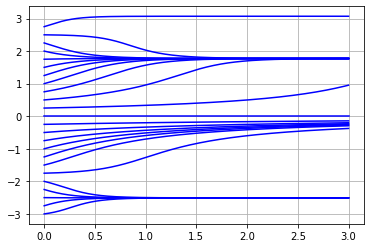

In [ ]:
###IMPLEMENTACJA METODY NUMERYCZNEJ###
def adamsBashfort_method(f, t0, y0, h, n):
    ys = np.ndarray(n + 1, dtype = float)
    ts = np.ndarray(n + 1, dtype = float)
    ts[0:5], ys[0:5] = rungeKutta_method(f, t0, y0, h, 4)
    fs = Queue()
    for i in range(4):
        fs.enqueue(f(ts[i], ys[i]))
    
    for i in range(4, n):
        fs.enqueue(f(ts[i], ys[i]))
        ys[i + 1] = ys[i] + h / 720.0 * (1901 * fs.get_item(4) - 2774 * fs.get_item(3) + 2616 * fs.get_item(2) - 1274 * fs.get_item(1) + 251 * fs.get_item(0))
        fs.dequeue()
        ts[i + 1] = ts[i] + h
    return ts, ys


###DANE##
t0 = 0
tk = 3
y0 = -1
h = 0.01
n = (tk + h) // h
f = lambda t, y: np.sin(y ** 2)
for y0 in np.arange(-3,3,0.25):
    ts_, ys_ = adamsBashfort_method(f, t0, y0, h, int(n))
    plt.plot(ts_, ys_, 'b-')#numerical

###WYKRES###
plt.grid(1)
plt.show()


Jeśli w powyższym założeniu weźmiemy, że wartość szukanej całki zależeć będzie także od punktu $(t_{n+1},y_{n+1})$ to możemy dokonać przedstawienia $$
y_{n+1}=y_n+C_1f_{n+1} + C_2f_n + C_3f_{n-1} + \dots.
$$
Postępując analogicznie jak wcześniej otrzymamy wzór zwany wzorem Adamsa-Moultona 
$$
y_{n+1}=y_n+\frac{1}{720}h(251f_{n+1}+646f_{n}-264f_{n-1}+106f_{n-2}+19f_{n-3}),
$$
w tym ptzypadku rzędu 5. Wiąże się to z dodatkowym problmem znalezienia wartości $y_{n+1}$. Stąd też koncept stosowania innej metody numerycznej do wyznaczania kolejnych punktów i kolejne ich "korygowanie" danym wzorem, stąd też określa się ją często mianem metody typu predyktor-korektor. Oto imlementacja Adamsa Moultona rzędu 5.

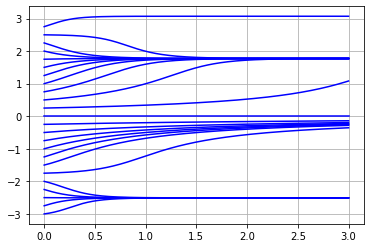

In [ ]:
###IMPLEMENTACJA METODY NUMERYCZNEJ###
def adamsMoulton_method(f, t0, y0, h, n):
    ys = np.ndarray(n + 1, dtype = float)
    ts = np.ndarray(n + 1, dtype = float)
    ts[0:5], ys[0:5] = rungeKutta_method(f, t0, y0, h, 4)
    fs = Queue()
    for i in range(5):
        fs.enqueue(f(ts[i], ys[i]))
    
    for i in range(4, n):
        ts[i + 1] = ts[i] + h
        ys[i + 1] = ys[i] + h / 720.0 * (1901 * fs.get_item(4) - 2774 * fs.get_item(3) + 2616 * fs.get_item(2) - 1274 * fs.get_item(1) + 251 * fs.get_item(0))
        fs.enqueue(f(ts[i + 1], ys[i + 1]))
        fs.dequeue()
        ys[i + 1] = ys[i] + h / 720.0 * (251 * fs.get_item(4) + 646 * fs.get_item(3) - 264 * fs.get_item(2) + 106 * fs.get_item(1) + 19 * fs.get_item(0))
    return ts, ys



###DANE##
t0 = 0
tk = 3
y0 = -1
h = 0.01
n = (tk + h) // h
f = lambda t, y: np.sin(y ** 2)
for y0 in np.arange(-3,3,0.25):
    ts_, ys_ = adamsMoulton_method(f, t0, y0, h, int(n))
    plt.plot(ts_, ys_, 'b-')#numerical

###WYKRES###
plt.grid(1)
plt.show()




# Część IV: Wnioski

# Bibliografia

William E. Boyce, Richard C. Dirprima, Douglas B. Meade, Elementary "Differential Equations and Boundary Value Problems 11th Edition", USA
David Kinciad, Ward Cheney, "Analiza numeryczna", Warszawa 2006
Edwin "Jed" Herman, Gilbert Strang, "Calculus Volume 3", Houston 2016
L.Glass, J.D. Murray, "Mathematical Biology I: An Introduction Third Edition"